<a href="https://colab.research.google.com/github/mayumiluiza/battle_of_queens/blob/main/Case_Hotmart_Mayumi_Kobayashi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Hotmart


## Principais Públicos
* **Produtores** são pessoas que criam produtos digitais na Hotmart, como
cursos de idiomas, ebooks de receitas culinárias, audiolivros, softwares, dentre
muitos outros exemplos.
* **Afiliados** são pessoas que promovem produtos dos produtores em troca de
uma comissão na venda, que varia de produto para produto, e de afiliado para
afiliado.
* **Compradores** são pessoas que adquirem um ou mais produtos digitais.


## Objetivo do Case
Grar Insights sobre os dados no dataset.

## Sobre o Dataset
Amostra de compras feitas na Hotmart em 2016. Tratam-se de mais de 1,5 milhão registros de compras realizadas na plataforma.
* purchase_id: Identificação da compra na Hotmart;
* product_id: Identificação do produto na Hotmart;
* affiliate_id: Identificação do afiliado na Hotmart;
* producer_id: Identificação do produtor na Hotmart;
* buyer_id: Identificação do comprador na Hotmart;
* purchase_date: Data e hora em que a compra foi realizada;
* product_creation_date: Data e hora em que o produto foi criado na Hotmart;
* product_category: categoria do produto na Hotmart. Exemplo: e-book,
software, curso online, e-tickets, etc.;
* product_niche: nicho de mercado que o produto faz parte. Exemplo:
educação, saúde e bem-estar, sexualidade, etc.;
* purchase_value: valor da compra. Esse dado, assim como nicho e categoria foi
codificado para manter a confidencialidade. O valor apresentado no dataset é
o z-score do valor real;
* affiliate_commission_percentual: percentual de comissão que o afiliado
receberá da compra;
* purchase_device: tipo de dispositivo utilizado no momento da compra, como:
Desktop, Mobile, Tablet, ou Outros;
* purchase_origin: endereço do site do qual a pessoa veio antes da compra. Por
exemplo, se uma pessoa veio do Facebook, Youtube, ou até mesmo de outra
página no site oficial do produto;
* is_origin_page_social_network: informa se essa compra veio de uma URL do
Facebook, Youtube, Instagram, Pinterest, ou Twitter.

**Algumas regras de negócio**
* Quando a compra for feita diretamente pelo produtor, ou seja, quando não
houver afiliado intermediando a compra, o campo affiliate_commission_percentual terá valor 0, e o campo affiliate_id será
igual ao producer_id;
* No campo purchase_origin nós apenas consideramos o host do site. Isso quer
dizer que, se uma pessoa veio do site www.meuproduto.com/promocoes,
esse campo só irá retornar o valor www.meuproduto.com;

## Perguntas a serem investigadas:

* Como você classifica a saúde do negócio Hotmart a partir dos dados
extraídos?
* Existe algum padrão ou tendência relevante nos dados?
* Baseado nos dados extraídos, o time de marketing precisa saber como
aumentar a eficiência de suas campanhas. O que você recomendaria?

# Importando bibliotecas

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Conectando Colab com MySQL

In [93]:
!pip install pymysql


In [94]:
import pymysql

In [95]:
conexao = pymysql.connect(
    host='interview-2.ck1h5ksgzpiq.us-east-1.rds.amazonaws.com',
    user='hotinterview',
    password='6cT4jk9QWPhQC9KXWKDd',
    database='innodb',
    port=3306
)

In [96]:
sales_data = pd.read_sql("SELECT * FROM sales_data", conexao)

<ipython-input-96-9106f89dfa94>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_data = pd.read_sql("SELECT * FROM sales_data", conexao)


# Análise Exploratória de Dados (EDA)

In [97]:
sales_data.head()

,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_creation_date,product_category,product_niche,purchase_value,affiliate_commission_percentual,purchase_device,purchase_origin,is_origin_page_social_network,Venda
0,1663958,6640,209372,116238,1200397,2016-06-26 12:00:00,2011-03-19 15:47:36,Video,Presentation skills,-0.265302,NaN,Smart TV,Origin ef2b,"0,0",1
1,1677087,2350,141418,2821,1083764,2016-06-26 12:00:00,2010-07-05 01:50:15,Podcast,Child psychology,-0.177077,NaN,Smart TV,Origin ef2b,"0,0",1
2,2017360,35669,618642,618642,1436106,2016-06-26 12:00:00,2012-06-13 02:59:37,Podcast,Presentation skills,-0.468989,NaN,Smart TV,Origin ef2b,"0,0",1
3,2017379,57998,1164511,70388,1436118,2016-06-26 12:00:00,2013-05-07 08:51:31,Podcast,Anxiety management,-0.401168,NaN,Smart TV,Origin ef2b,"0,0",1
4,2017382,58329,1261488,221253,1386357,2016-06-26 12:00:00,2013-05-12 08:12:06,Podcast,Teaching English,-0.452489,NaN,Smart TV,Origin ef2b,"0,0",1


In [98]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599828 entries, 0 to 1599827
Data columns (total 15 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   purchase_id                      1599828 non-null  int64         
 1   product_id                       1599828 non-null  int64         
 2   affiliate_id                     1599828 non-null  int64         
 3   producer_id                      1599828 non-null  int64         
 4   buyer_id                         1599828 non-null  int64         
 5   purchase_date                    1599828 non-null  datetime64[ns]
 6   product_creation_date            1599828 non-null  datetime64[ns]
 7   product_category                 1599828 non-null  object        
 8   product_niche                    1599828 non-null  object        
 9   purchase_value                   1599828 non-null  float64       
 10  affiliate_commission_percentua

## Análise sobre Valores de Vendas - Positivação dos valores

In [99]:
# Valor máximo de um produto

sales_data['purchase_value'].max()

124.561

In [100]:
# Valor mínimo de um produto
sales_data['purchase_value'].min()

-0.54124

(array([203577., 935793., 252173.,  84967.,  30693.,  25335.,  16592.,
         12496.,  11073.,  13122.]),
 array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ]),
 <BarContainer object of 10 artists>)

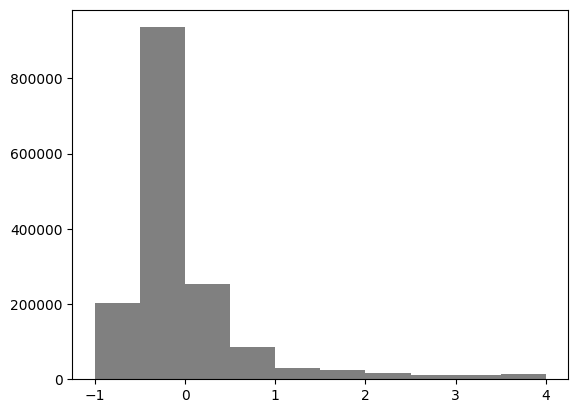

In [101]:
# Histograma de valores

plt.hist(data=sales_data, x='purchase_value', range=[-1,4], facecolor='gray', align='mid')


In [102]:
# Adicionando coluna para ter valores positivos de vendas
media = 1
desvio_padrao = 1

sales_data['positive_purchase_value'] = (sales_data['purchase_value'] * desvio_padrao) + media

In [103]:
# Verificando novo valor mínimo de um produto para confirmar se é positivo

sales_data['positive_purchase_value'].min()

0.45875999999999995

## Análise sobre produto mais caro

In [104]:
# Verificando o valor mais alto de um produto
sales_data['positive_purchase_value'].max()

125.561

In [105]:
# Descobrindo qual é o produto e nicho do valor mais alto
sales_data[sales_data['positive_purchase_value'] == 125.561]

,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_creation_date,product_category,product_niche,purchase_value,affiliate_commission_percentual,purchase_device,purchase_origin,is_origin_page_social_network,Venda,positive_purchase_value
1378590,13578579,229396,5230700,5230700,7375717,2016-06-07 13:17:26,2016-05-16 19:48:17,Phisical book,Presentation skills,124.561,0.0,Desktop,Origin 35c7,"0,0",1,125.561


In [106]:
# Descobrindo quantos produtos fazem parte dessa categoria e nicho
phisicalBook_presentationSkills	= sales_data[(sales_data['product_category'] == 'Phisical book') & (sales_data['product_niche'] == 'Presentation skills')]
len(phisicalBook_presentationSkills)

123245

In [107]:
# Descobrindo quanto o outlier impacta nos valores totais do produtos 1
phisicalBook_presentationSkills['positive_purchase_value'].max()

125.561

In [108]:
# Descobrindo quanto o outlier impacta nos valores totais do produtos 2
phisicalBook_presentationSkills['positive_purchase_value'].mean()

1.285729787171212

In [109]:
# Descobrindo quanto o outlier impacta nos valores totais do produtos 3
phisicalBook_presentationSkills['positive_purchase_value'].median()

0.9224112

In [110]:
# Descobrindo quanto o outlier impacta nos valores totais do produtos 4
phisicalBook_presentationSkills['positive_purchase_value'].min()

0.45875999999999995

## Análise sobre Categoria dos Produtos




In [111]:
# Verificando quais produtos vendem mais
sales_data['product_category'].value_counts()

Phisical book      1334610
Podcast             216720
Workshop             38246
eBook                 3965
Subscription          1970
In-class course       1561
App                   1557
eTicket                847
Webinar                295
Video                   57
Name: product_category, dtype: int64

In [112]:
# Porcentagem de vendas por produto
product_category_porcentagem = ((sales_data['product_category'].value_counts()) / len(sales_data)) * 100
product_category_porcentagem

Phisical book      83.422093
Podcast            13.546456
Workshop            2.390632
eBook               0.247839
Subscription        0.123138
In-class course     0.097573
App                 0.097323
eTicket             0.052943
Webinar             0.018439
Video               0.003563
Name: product_category, dtype: float64

In [113]:
# Total de valores de vendas por produtos
soma_por_produto = sales_data.groupby('product_category')['positive_purchase_value'].sum()
soma_por_produto.sort_values(ascending=False)

product_category
Phisical book      1.402207e+06
Podcast            1.259540e+05
Workshop           6.390643e+04
eBook              2.574306e+03
In-class course    1.871868e+03
Subscription       1.584796e+03
App                1.035818e+03
eTicket            4.745724e+02
Webinar            1.547510e+02
Video              6.420463e+01
Name: positive_purchase_value, dtype: float64

In [114]:
# Porcentagem de valores de vendas por produto
total_soma_produtos = soma_por_produto.sum()

porcentagens_soma_produtos = (soma_por_produto / total_soma_produtos) * 100

porcentagens_soma_produtos_ordenadas = porcentagens_soma_produtos.sort_values(ascending=False)

porcentagens_soma_produtos_ordenadas

product_category
Phisical book      87.647373
Podcast             7.872974
Workshop            3.994581
eBook               0.160911
In-class course     0.117004
Subscription        0.099060
App                 0.064746
eTicket             0.029664
Webinar             0.009673
Video               0.004013
Name: positive_purchase_value, dtype: float64

In [115]:
# Total de valores de vendas por produtos e nichos
soma_por_produto_nicho = sales_data.groupby(['product_category', 'product_niche'])['positive_purchase_value'].sum()
soma_por_produto_nicho.sort_values(ascending=False)

product_category  product_niche         
Phisical book     Negotiation               236389.336380
                  Anxiety management        205232.590078
                  Personal finance          186601.194154
                  Presentation skills       158459.767620
                  Accounting                 93520.833274
                                                ...      
App               Immigration                    0.496115
In-class course   Immigration                    0.496115
Webinar           YouTube video creation         0.481286
In-class course   Filmmaking                     0.477344
App               YouTube video creation         0.468127
Name: positive_purchase_value, Length: 143, dtype: float64

### Insight Final de Produtos e Nichos

In [116]:
# Porcentagem de vendas por produto e nicho

vendas_por_produto = sales_data.groupby(['product_category', 'product_niche'])['positive_purchase_value'].count()

total_vendas_por_produtos = len(sales_data)

porcentagens_vendas_por_produto = (vendas_por_produto / total_vendas_por_produtos) * 100

pd.set_option('display.max_rows', None)

porcentagens_vendas_por_produto.sort_values(ascending=False, inplace=True)
porcentagens_vendas_por_produto

product_category  product_niche         
Phisical book     Negotiation               15.025365
                  Anxiety management        12.168058
                  Personal finance           9.766737
                  Presentation skills        7.703641
                  Immigration                5.829064
                  YouTube video creation     4.937218
Podcast           Anxiety management         3.407429
Phisical book     Online course creation     3.199906
                  Government                 3.162215
                  Organization               2.886123
                  Accounting                 2.742232
Podcast           Government                 2.663161
Phisical book     Careers                    2.621969
                  Economics                  2.371755
                  Procrastination            2.045720
Podcast           Negotiation                2.022592
Phisical book     Biology                    1.720560
                  Media training         

In [117]:
# Porcentagem de valores de vendas por produto e nicho
total_soma_por_produto_nicho = soma_por_produto_nicho.sum()

porcentagens_soma_por_produto_nicho = (soma_por_produto_nicho / total_soma_por_produto_nicho) * 100

pd.set_option('display.max_rows', None)
porcentagens_soma_por_produto_nicho.sort_values(ascending=False)


product_category  product_niche         
Phisical book     Negotiation               14.775922
                  Anxiety management        12.828416
                  Personal finance          11.663828
                  Presentation skills        9.904800
                  Accounting                 5.845680
                  Careers                    4.363279
                  Immigration                3.876185
                  YouTube video creation     3.684430
                  Online course creation     2.872526
                  Government                 2.638964
                  Organization               2.544751
                  Economics                  2.192534
Podcast           Anxiety management         2.009400
Phisical book     Media training             1.908754
                  Procrastination            1.586693
                  Biology                    1.473389
Podcast           Government                 1.421305
Workshop          Personal finance       

## Análise sobre Produtores

In [118]:
#Média de vendas por produtor
sales_data.groupby('producer_id').size().mean()


199.47980049875312

In [119]:
#Mediana de vendas por produtor
sales_data.groupby('producer_id').size().median()

9.0

In [120]:
#Média de produtos por produtor
sales_data.groupby(['producer_id','product_id']).size().mean()

89.46082872001342

In [121]:
#Mediana de produtos por produtor
sales_data.groupby(['producer_id','product_id']).size().median()

7.0

### Produtores com maior número de vendas

In [122]:
contagem_por_produtores = sales_data['producer_id'].value_counts()
total_contagem_por_produtores = len(sales_data)

porcentagens_por_vendas_produtores = (contagem_por_produtores / total_contagem_por_produtores) * 100

porcentagens_por_vendas_produtores.sort_values(ascending=False)


6697083    2.576527
3992235    2.458452
464846     2.217113
349701     2.160732
166090     1.806132
442241     1.737562
2307584    1.357646
3382787    1.262573
4580574    1.024235
671256     1.006108
34602      0.910348
1745680    0.885845
42346      0.827589
3512       0.808274
2546880    0.654383
503778     0.653570
3672       0.641131
3733836    0.637193
2026525    0.630943
906263     0.565311
4462059    0.551997
5502       0.526244
3256650    0.509367
4831032    0.497178
3457699    0.494428
3364586    0.458924
1853968    0.446360
760        0.442423
204867     0.430171
2724       0.416045
1083123    0.410857
3710133    0.409857
710989     0.367540
812946     0.366227
586839     0.365914
4734645    0.365414
122195     0.361226
3743891    0.355476
3630929    0.352850
762777     0.349288
1931767    0.348350
366308     0.347912
1160       0.332098
1186145    0.331098
248402     0.330286
546051     0.321035
4231895    0.320284
57059      0.319347
2167811    0.313034
213339     0.312159


#### Verificação de número de Vendas

In [123]:
# Quantidade de Vendas - 1
len(sales_data[sales_data['producer_id'] ==  6697083])

41220

In [124]:
# Quantidade de Vendas - 2
len(sales_data[sales_data['producer_id'] ==  3992235])

39331

In [125]:
# Quantidade de Vendas - 3
len(sales_data[sales_data['producer_id'] ==  464846])

35470

### Produtores com maiores valores de vendas

In [126]:
#Produtores com maiores números de vendas
pd.reset_option('display.max_rows')

soma_por_produtores = sales_data.groupby('producer_id')['positive_purchase_value'].sum()

total_vendas_produtores = soma_por_produtores.sum()

porcentagens_por_produtores = (soma_por_produtores / total_vendas_produtores) * 100

porcentagens_por_produtores.sort_values(ascending=False)


producer_id
42346      2.359414
349701     1.962880
3992235    1.610454
6697083    1.511334
464846     1.439686
             ...   
1069744    0.000029
7353537    0.000029
6545494    0.000029
5379733    0.000029
7341877    0.000029
Name: positive_purchase_value, Length: 8020, dtype: float64

#### Produtor com maiores valores de vendas 1

In [127]:
# Produtor número 1 com mais vendas - Categoria e Nicho dos Produtos
produtor_com_maiores_valores = sales_data[sales_data['producer_id'] ==  42346]
produtor_com_maiores_valores.groupby(['product_category', 'product_niche'])['positive_purchase_value'].count()


product_category  product_niche
Phisical book     Accounting       13240
Name: positive_purchase_value, dtype: int64

In [128]:
# Produtor número 1 com mais vendas - Quantidade de Produtos
len(produtor_com_maiores_valores['product_id'].value_counts())

4

In [129]:
# Produtor número 1 com mais vendas - Desde quanto vende os produtos
produtor_com_maiores_valores['product_creation_date'].value_counts()

2014-07-11 21:33:55    6923
2014-12-01 16:42:09    3538
2015-11-22 15:03:12    2771
2016-02-05 13:11:29       8
Name: product_creation_date, dtype: int64

In [130]:
# Produtor número 1 com mais vendas - Apoio de Afiliados?
produtor_com_maiores_valores['affiliate_id'].value_counts()

42346     13234
338257        2
858194        1
145240        1
197912        1
127733        1
Name: affiliate_id, dtype: int64

#### Produtor com maiores valores de vendas 2

In [131]:
# Produtor número 2 com mais vendas
produtor_com_maiores_valores_2 = sales_data[sales_data['producer_id'] ==  349701]
produtor_com_maiores_valores_2.groupby(['product_category', 'product_niche'])['positive_purchase_value'].count()


product_category  product_niche     
Phisical book     Anxiety management    31948
                  Media training           17
                  Organization           2603
Name: positive_purchase_value, dtype: int64

In [132]:
# Produtor número 2 com mais vendas - Quantidade de Produtos
len(produtor_com_maiores_valores_2['product_id'].value_counts())

35

In [133]:
# Produtor número 2 com mais vendas - Desde quanto vende os produtos
produtor_com_maiores_valores_2['product_creation_date'].value_counts()

2015-12-14 16:22:37    10018
2014-03-29 17:14:31     5815
2016-02-28 17:09:07     3136
2015-12-14 19:00:08     3098
2015-01-11 14:45:08     2762
2015-12-27 13:17:06     2384
2015-12-14 18:55:32     1651
2015-07-13 20:39:22     1457
2015-03-22 20:50:51     1077
2016-05-15 20:32:41      952
2015-01-12 11:17:39      846
2016-05-15 20:48:32      633
2016-03-21 13:21:38      191
2015-07-13 20:47:06      176
2016-01-16 12:16:42       66
2016-06-05 20:07:55       50
2016-01-16 12:18:53       49
2013-10-05 09:34:11       39
2016-03-09 13:53:45       26
2014-12-16 11:49:01       18
2015-12-19 14:04:54       17
2013-09-15 17:46:17       17
2015-10-24 16:12:42       14
2015-03-22 20:56:34       14
2015-05-05 18:18:45       13
2015-10-24 16:22:02       12
2015-08-01 12:33:12        8
2015-12-01 12:36:14        6
2014-12-16 12:17:23        5
2015-03-14 13:13:05        5
2014-12-02 09:00:40        4
2015-06-29 13:47:56        4
2014-10-20 08:54:09        3
2014-12-02 08:56:32        1
2016-05-03 18:

In [134]:
# Produtor número 2 com mais vendas (349701) - Apoio de Afiliados?
produtor_com_maiores_valores_2['affiliate_id'].value_counts()

349701     31969
2920         745
3045250      612
7300750      304
558822       252
3968280      245
382683        68
75044         55
450805        39
19337         29
2334099       23
172357        22
238144        19
7992          16
1469316       13
992151        13
355999        11
483489        10
290865         9
1563113        8
825916         8
1008185        7
26387          7
755262         6
1167923        6
1077153        5
4904505        4
800123         4
851535         4
21532          4
1570307        4
2683634        4
3396681        3
3128130        3
1665198        3
438333         3
314316         3
372137         2
12826          2
557390         2
10536          2
125844         2
177246         2
1464354        2
248172         1
44874          1
828683         1
131845         1
44469          1
2132580        1
5782768        1
87842          1
1043916        1
2458737        1
1700488        1
1446391        1
852961         1
337921         1
Name: affiliat

#### Produtor com maiores valores de vendas 3

In [135]:
# Produtor número 3 com mais vendas
produtor_com_maiores_valores_3 = sales_data[sales_data['producer_id'] ==  3992235]
produtor_com_maiores_valores_3.groupby(['product_category', 'product_niche'])['positive_purchase_value'].count()


product_category  product_niche
Phisical book     Immigration      39331
Name: positive_purchase_value, dtype: int64

In [136]:
# Produtor número 3 com mais vendas - Quantidade de Produtos
len(produtor_com_maiores_valores_3['product_id'].value_counts())

5

In [137]:
# Produtor número 3 com mais vendas - Desde quanto vende os produtos
produtor_com_maiores_valores_3['product_creation_date'].value_counts()

2014-12-29 12:36:10    32731
2015-08-11 12:53:41     5358
2015-08-30 20:48:48      608
2015-10-16 13:21:23      601
2016-03-22 14:42:40       33
Name: product_creation_date, dtype: int64

In [138]:
# Produtor número 3 com mais vendas (3992235) - Apoio de Afiliados?
produtor_com_maiores_valores_3['affiliate_id'].value_counts()

3992235    21437
231479      6663
1461508      869
1382699      568
78325        564
           ...  
4970107        1
6724327        1
345536         1
6610611        1
914181         1
Name: affiliate_id, Length: 366, dtype: int64

### Produtor com produto mais antigo

In [139]:
# Verificar data mais antiga
sales_data['product_creation_date'].min()

Timestamp('2008-10-27 01:39:34')

In [140]:
# Descobrir produto mais antigo
sales_data[sales_data['product_creation_date'] == '2008-10-27 01:39:34']

,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_creation_date,product_category,product_niche,purchase_value,affiliate_commission_percentual,purchase_device,purchase_origin,is_origin_page_social_network,Venda,positive_purchase_value
149539,11139442,4,3,3,886982,2016-01-19 15:00:52,2008-10-27 01:39:34,Podcast,Disease,-0.535608,0.0,Desktop,Origin 5187,"0,0",1,0.464392
1102503,13050273,4,3,3,2300933,2016-05-08 21:23:11,2008-10-27 01:39:34,Podcast,Disease,-0.535608,0.0,Desktop,Origin 5187,"0,0",1,0.464392


In [141]:
# Descobrir dados de produtor com produto mais antigo
produto_mais_antigo = sales_data[sales_data['producer_id'] == 3]
produto_mais_antigo['positive_purchase_value'].sum()

50.365701

In [142]:
# Descobrir dados de categoria de produtor com produto mais antigo
produto_mais_antigo['product_category'].value_counts()

Phisical book    97
Podcast           2
Name: product_category, dtype: int64

In [143]:
# Descobrir dados de nicho de produtor com produto mais antigo
produto_mais_antigo['product_niche'].value_counts()

Procrastination    97
Disease             2
Name: product_niche, dtype: int64

## Análise sobre Afiliados

In [144]:
#Quem são afiliados?
lista_afiliados = set(sales_data['affiliate_id']) - set(sales_data['producer_id'])
len(lista_afiliados)

15223

In [145]:
#Df apenas com Vendas de Afiliados
vendas_por_afiliados = sales_data[sales_data['affiliate_id'].isin(lista_afiliados)]
vendas_por_afiliados

,purchase_id,product_id,affiliate_id,producer_id,buyer_id,purchase_date,product_creation_date,product_category,product_niche,purchase_value,affiliate_commission_percentual,purchase_device,purchase_origin,is_origin_page_social_network,Venda,positive_purchase_value
0,1663958,6640,209372,116238,1200397,2016-06-26 12:00:00,2011-03-19 15:47:36,Video,Presentation skills,-0.265302,NaN,Smart TV,Origin ef2b,"0,0",1,0.734698
5,2017387,17889,354805,192982,1274423,2016-06-26 12:00:00,2011-12-18 09:31:54,Phisical book,Online course creation,-0.503716,NaN,Smart TV,Origin ef2b,"0,0",1,0.496284
10,2017632,19587,218614,75347,1435737,2016-06-26 12:00:00,2012-01-29 11:51:39,eBook,YouTube video creation,-0.427185,NaN,Smart TV,Origin ef2b,"0,0",1,0.572815
14,2017742,49986,1375735,1029903,1436237,2016-06-26 12:00:00,2013-01-06 01:05:09,Podcast,Procrastination,-0.411718,NaN,Smart TV,Origin ef2b,"0,0",1,0.588282
19,2017986,4069,65083,6036,1436300,2016-06-26 12:00:00,2010-11-21 01:46:41,In-class course,Presentation skills,-0.447571,NaN,Smart TV,Origin ef2b,"0,0",1,0.552429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599812,14011975,86712,1738849,2167811,6447841,2016-06-30 23:58:24,2014-02-22 22:32:08,Phisical book,Procrastination,-0.333254,80.0,eReaders,Origin 4475,"0,0",1,0.666746
1599814,14011977,112024,1916137,606104,7701868,2016-06-30 23:58:25,2014-08-09 10:18:38,Phisical book,Presentation skills,0.016268,25.0,eReaders,Origin 81da,"0,0",1,1.016268
1599815,14011978,83377,5781442,2307584,7701870,2016-06-30 23:58:37,2014-01-24 19:46:59,Phisical book,Anxiety management,-0.352326,60.0,eReaders,Origin 2d75,"0,0",1,0.647674
1599821,14011993,85984,33980,34602,7701877,2016-06-30 23:59:34,2014-02-17 14:15:23,Phisical book,Anxiety management,0.742717,50.0,Desktop,Origin 7fd6,"0,0",1,1.742717


In [146]:
#Porcentagem de Vendas por Afiliados
(len(vendas_por_afiliados) * 100) / len(sales_data)

17.365554297086938

In [147]:
#Porcentagem de Valores por Afiliados
(vendas_por_afiliados['positive_purchase_value'].sum() * 100) / sales_data['positive_purchase_value'].sum()

14.625305520069642

In [148]:
#Afiliado com mais volume de vendas
afiliados_vendas = vendas_por_afiliados['affiliate_id'].value_counts()
total_soma_afiliados_vendas = afiliados_vendas.sum()
porcentagens_por_afiliado_vendas = (afiliados_vendas / total_soma_afiliados_vendas) * 100
porcentagens_por_afiliado_vendas.sort_values(ascending=False)

231479     2.604214
3124408    2.397964
1738849    1.736382
497456     1.588444
1927003    1.498458
             ...   
7443164    0.000360
6800910    0.000360
1084921    0.000360
3250257    0.000360
6071464    0.000360
Name: affiliate_id, Length: 15223, dtype: float64

In [234]:
#Afiliado com maior volume de vendas 231479
afiliado_231479 = vendas_por_afiliados[vendas_por_afiliados['affiliate_id'] == 231479]
afiliado_231479.groupby(afiliado_231479['purchase_date'].dt.month)['purchase_date'].count()


purchase_date
1     961
2     962
3    1102
4    1128
5    1547
6    1535
Name: purchase_date, dtype: int64

In [149]:
#Afiliado com mais valores de venda
afiliados_valores = vendas_por_afiliados.groupby('affiliate_id')['positive_purchase_value'].sum()
total_soma_afiliados_valores = afiliados_valores.sum()
porcentagens_por_afiliado = (afiliados_valores / total_soma_afiliados_valores) * 100
porcentagens_por_afiliado.sort_values(ascending=False)

affiliate_id
497456     2.919843
3124408    2.486478
231479     2.012656
1927003    1.515715
1738849    1.381508
             ...   
4611636    0.000196
1452653    0.000196
4745168    0.000196
1561070    0.000196
6367       0.000196
Name: positive_purchase_value, Length: 15223, dtype: float64

In [229]:
# Produto mais vendido por afiliados
produtos_vendas_por_afiliados = vendas_por_afiliados.groupby(['product_category', 'product_niche'])['positive_purchase_value'].sum()

total_produtos_vendas_por_afiliados = produtos_vendas_por_afiliados.sum()

porcentagens_produtos_vendas_por_afiliados = (produtos_vendas_por_afiliados / total_produtos_vendas_por_afiliados) * 100
porcentagens_produtos_vendas_por_afiliados.sort_values(ascending=False)

product_category  product_niche         
Phisical book     Negotiation               15.582194
                  Presentation skills       13.858494
                  Personal finance          10.986226
                  Anxiety management         9.901226
                  YouTube video creation     5.900808
                                              ...    
eTicket           Careers                    0.000251
In-class course   Immigration                0.000212
eTicket           Online course creation     0.000211
App               YouTube video creation     0.000200
eTicket           Economics                  0.000199
Name: positive_purchase_value, Length: 103, dtype: float64

## Análise sobre tipo de dispositivo utilizado no momento da compra




In [150]:
# Total de Volume por Dispositivo
sales_data['purchase_device'].value_counts()

eReaders     664197
Desktop      581900
Smart TV     330073
Cellphone     20708
Tablet         2950
Name: purchase_device, dtype: int64

In [151]:
# Porcentagem de Volume por Dispositivo
purchase_device_porcentagem = ((sales_data['purchase_device'].value_counts()) / len(sales_data)) * 100
purchase_device_porcentagem

eReaders     41.516776
Desktop      36.372660
Smart TV     20.631780
Cellphone     1.294389
Tablet        0.184395
Name: purchase_device, dtype: float64

In [152]:
# Total de Valores por Dispositivo
sales_data.groupby('purchase_device')['positive_purchase_value'].sum()

purchase_device
Cellphone     24756.856558
Desktop      686518.157307
Smart TV     206165.557657
Tablet         3454.861570
eReaders     678932.586882
Name: positive_purchase_value, dtype: float64

In [197]:
# Porcentagem de Valores por Dispositivo
(sales_data.groupby('purchase_device')['positive_purchase_value'].sum() / sales_data['positive_purchase_value'].sum()) * 100

purchase_device
Cellphone     1.547470
Desktop      42.911997
Smart TV     12.886733
Tablet        0.215952
eReaders     42.437848
Name: positive_purchase_value, dtype: float64

## Análise sobre tipo de endereço do site do qual a pessoa veio antes da compra

In [154]:
# Analisando sites de origem
sales_data['purchase_origin'].value_counts()

Origin ef2b    330077
Origin 5187    167028
Origin adf0     77857
Origin 18eb     28693
Origin 3ade     13069
                ...  
Origin e51d         1
Origin d5eb         1
Origin 00ca         1
Origin 7475         1
Origin 290d         1
Name: purchase_origin, Length: 9603, dtype: int64

### Not social networks

In [155]:
# Verificando dos não social networks quais tem maiores vendas
not_social_network_sales = sales_data[sales_data['is_origin_page_social_network']=="0,0"]
(not_social_network_sales['purchase_origin'].value_counts() / len(not_social_network_sales)) *100

Origin ef2b    21.118481
Origin 5187    10.686530
Origin adf0     4.981327
Origin 18eb     1.835792
Origin 3ade     0.836161
                 ...    
Origin 6878     0.000064
Origin 4612     0.000064
Origin e0c5     0.000064
Origin 54a0     0.000064
Origin 290d     0.000064
Name: purchase_origin, Length: 9589, dtype: float64

In [218]:
# % de valores de not social networks
 (not_social_network_sales['positive_purchase_value'].sum() / sales_data['positive_purchase_value'].sum()) * 100

98.00967023144882

In [224]:
# Verificando dos não social networks quais tem maiores valores
not_social_network_sales_values = (not_social_network_sales.groupby('purchase_origin')['positive_purchase_value'].sum() / not_social_network_sales['positive_purchase_value'].sum()) * 100
not_social_network_sales_values.sort_values(ascending = False)

purchase_origin
Origin 5187    13.623394
Origin ef2b    13.148606
Origin adf0     3.378924
Origin 7333     1.661176
Origin 18eb     1.142519
                 ...    
Origin 4163     0.000029
Origin 53b5     0.000029
Origin 1b6a     0.000029
Origin 628b     0.000029
Origin bd46     0.000029
Name: positive_purchase_value, Length: 9589, dtype: float64

### Social Networks

In [157]:
# Verificando se há uma descrição mais clara de social networks
valor_procurado = 'Facebook'
resultado = sales_data[sales_data['purchase_origin'] == valor_procurado]

if not resultado.empty:
    print("Resultado encontrado:")
    print(resultado)
else:
    print("Nenhum resultado encontrado.")

Nenhum resultado encontrado.


In [216]:
# Verificando do total de vendas quantos são de social network
(sales_data['is_origin_page_social_network'].value_counts() / len(sales_data)) *100

0,0    97.696565
1,0     2.303435
Name: is_origin_page_social_network, dtype: float64

In [159]:
# Verificando dos social quais tem maiores vendas
social_network_sales = sales_data[sales_data['is_origin_page_social_network']=="1,0"]
(social_network_sales['purchase_origin'].value_counts()/ len(social_network_sales)) *100

Origin cd46    29.098261
Origin d834    24.702179
Origin 9a9e    17.264118
Origin 1fff    11.093322
Origin 6b1b     9.817915
Origin 65db     6.181650
Origin 2f5a     0.792380
Origin 1142     0.613281
Origin 6335     0.233372
Origin c3b1     0.086836
Origin f1fd     0.070554
Origin b529     0.010855
Origin d7b5     0.010855
Origin b027     0.008141
Origin 62dc     0.008141
Origin a375     0.005427
Origin eb97     0.002714
Name: purchase_origin, dtype: float64

In [222]:
# Verificando dos social quais tem maiores valores
social_network_sales_values = (social_network_sales.groupby('purchase_origin')['positive_purchase_value'].sum() / social_network_sales['positive_purchase_value'].sum()) * 100
social_network_sales_values.sort_values(ascending = False)

purchase_origin
Origin cd46    26.780343
Origin d834    25.252758
Origin 9a9e    20.750229
Origin 1fff    10.474024
Origin 6b1b     7.933672
Origin 65db     7.068717
Origin 2f5a     0.802975
Origin 1142     0.564860
Origin 6335     0.198202
Origin c3b1     0.075329
Origin f1fd     0.061229
Origin d7b5     0.008815
Origin b529     0.008685
Origin b027     0.008104
Origin 62dc     0.006496
Origin a375     0.003550
Origin eb97     0.002013
Name: positive_purchase_value, dtype: float64

## Dias e Horários

### Dias e Horário de Maiores Volumes de Vendas

In [161]:
# Dias da Semana Volume de Vendas (segunda-feira = 0 e domingo = 6.)
(sales_data['purchase_date'].dt.dayofweek.value_counts() / len(sales_data)) * 100

5    16.647165
6    15.934338
1    15.310083
0    15.255577
2    13.439757
4    12.392270
3    11.020810
Name: purchase_date, dtype: float64

In [162]:
# Horários Volume de Vendas
(sales_data['purchase_date'].dt.hour.value_counts() / len(sales_data)) * 100

13    7.786775
14    7.578377
12    7.409984
16    7.142018
17    7.113452
15    7.097200
18    6.651903
19    5.667609
0     5.664296
23    5.165618
20    4.795265
1     4.773013
22    4.417412
21    4.375220
11    3.730901
2     3.399803
10    2.143980
3     1.742000
9     0.942539
4     0.865656
5     0.473863
8     0.458549
6     0.305470
7     0.299095
Name: purchase_date, dtype: float64

In [163]:
# Combinação de Dias e Horários de Maior Volume de Vendas
vendas_por_dia_horario = sales_data.groupby([sales_data['purchase_date'].dt.dayofweek, sales_data['purchase_date'].dt.hour]).size()
total_vendas_por_dia_horario = vendas_por_dia_horario.sum()

porcentagens_vendas_por_dia_horario = (vendas_por_dia_horario / total_vendas_por_dia_horario) * 100

porcentagens_vendas_por_dia_horario.sort_values(ascending=False, inplace=True)
porcentagens_vendas_por_dia_horario

purchase_date  purchase_date
5              13               1.349020
               12               1.340332
               14               1.280888
6              13               1.229257
5              16               1.194878
                                  ...   
               6                0.040942
4              6                0.039942
2              7                0.039317
3              6                0.037004
               7                0.033066
Length: 168, dtype: float64

### Dias e Horário de Maiores Valores de Vendas

In [205]:
# Dias Maior Valor de Vendas
valores_por_dia_semana = sales_data.groupby(sales_data['purchase_date'].dt.dayofweek)['positive_purchase_value'].sum()
total_valores_por_dia_semana = valores_por_dia_semana.sum()

porcentagens_valores_por_dia_semana = (valores_por_dia_semana / total_valores_por_dia_semana) * 100

porcentagens_valores_por_dia_semana.sort_values(ascending=False, inplace=True)
porcentagens_valores_por_dia_semana

purchase_date
5    19.133817
6    17.193938
0    14.905963
1    14.539630
2    12.821464
4    11.617432
3     9.787754
Name: positive_purchase_value, dtype: float64

In [206]:
# Horários Maior Valor de Vendas
valores_por_horario = sales_data.groupby(sales_data['purchase_date'].dt.hour)['positive_purchase_value'].sum()
total_valores_por_horario = valores_por_horario.sum()

porcentagens_valores_por_horario = (valores_por_horario / total_valores_por_horario) * 100

porcentagens_valores_por_horario.sort_values(ascending=False, inplace=True)
porcentagens_valores_por_horario

purchase_date
13    7.425230
12    7.325704
14    7.084029
15    6.541220
16    6.511291
17    6.468263
0     6.326740
18    6.118415
23    5.481905
19    5.407166
1     5.341475
20    4.835180
11    4.681520
22    4.637647
21    4.564330
2     3.758970
10    2.446281
3     1.738814
9     0.946718
4     0.823956
8     0.472826
5     0.444875
7     0.324534
6     0.292910
Name: positive_purchase_value, dtype: float64

In [207]:
# Combinação de Dias e Horários de Maior Valor de Vendas
valores_por_dia_horario = sales_data.groupby([sales_data['purchase_date'].dt.dayofweek, sales_data['purchase_date'].dt.hour])['positive_purchase_value'].sum()
total_valores_por_dia_horario = valores_por_dia_horario.sum()

porcentagens_valores_por_dia_horario= (valores_por_dia_horario / total_valores_por_dia_horario) * 100

porcentagens_valores_por_dia_horario.sort_values(ascending=False, inplace=True)
porcentagens_valores_por_dia_horario

purchase_date  purchase_date
5              12               1.858224
               13               1.600451
               14               1.423058
               11               1.422624
6              13               1.277130
                                  ...   
2              7                0.040358
0              6                0.039069
4              6                0.035604
3              6                0.032405
               7                0.030291
Name: positive_purchase_value, Length: 168, dtype: float64

### Dias e Horários para Social Networks

In [225]:
# Dias Maior Volume de Vendas - Social Network
(social_network_sales['purchase_date'].dt.dayofweek.value_counts()  / len(social_network_sales)) * 100

5    16.273643
0    16.102684
1    15.782475
6    15.239749
2    15.201758
4    11.288703
3    10.110987
Name: purchase_date, dtype: float64

In [168]:
# Horários Maior Volume de Vendas - Social Network
(social_network_sales['purchase_date'].dt.hour.value_counts()  / len(social_network_sales)) * 100

0     10.097419
1      7.443489
23     7.169412
14     5.478820
15     5.457111
22     5.448970
13     5.400125
16     5.242734
2      5.229166
18     5.123335
17     5.107053
19     5.063635
20     5.055494
12     5.033785
21     4.960517
11     4.013460
10     2.358145
3      2.336436
9      1.128870
4      1.112589
5      0.610567
8      0.480313
6      0.331063
7      0.317495
Name: purchase_date, dtype: float64

In [169]:
# Combinação de Dias e Horários de Maior Volume de Vendas - Social Network
vendas_por_dia_horario_social = social_network_sales.groupby([social_network_sales['purchase_date'].dt.dayofweek, social_network_sales['purchase_date'].dt.hour]).size()
total_vendas_por_dia_horario_social = vendas_por_dia_horario_social.sum()

porcentagens_vendas_por_dia_horario_social = (vendas_por_dia_horario_social / total_vendas_por_dia_horario_social) * 100

porcentagens_vendas_por_dia_horario_social.sort_values(ascending=False)

purchase_date  purchase_date
0              0                2.130200
2              0                1.934819
6              0                1.856123
1              0                1.625465
2              1                1.527774
                                  ...   
1              6                0.040704
3              7                0.040704
4              8                0.032564
2              6                0.027136
4              7                0.027136
Length: 168, dtype: float64

In [208]:
# Dias Maior Valor de Vendas - Social Network
valores_por_dia_semana_social_network_sales = social_network_sales.groupby(social_network_sales['purchase_date'].dt.dayofweek)['positive_purchase_value'].sum()
total_valores_por_dia_semana_social_network_sales = valores_por_dia_semana_social_network_sales.sum()

porcentagens_valores_por_dia_semana_social_network_sales = (valores_por_dia_semana_social_network_sales / total_valores_por_dia_semana_social_network_sales) * 100

porcentagens_valores_por_dia_semana_social_network_sales.sort_values(ascending=False, inplace=True)
porcentagens_valores_por_dia_semana_social_network_sales

purchase_date
0    15.989628
2    15.877009
6    15.595171
1    15.330683
5    15.243331
4    12.225899
3     9.738280
Name: positive_purchase_value, dtype: float64

In [209]:
# Horários Maior Valor de Vendas - Social Network
valores_por_hora_social_network_sales = social_network_sales.groupby(social_network_sales['purchase_date'].dt.hour)['positive_purchase_value'].sum()
total_valores_hora_social_network_sales = valores_por_hora_social_network_sales.sum()

porcentagens_valores_por_hora_social_network_sales = (valores_por_hora_social_network_sales / total_valores_hora_social_network_sales) * 100

porcentagens_valores_por_hora_social_network_sales.sort_values(ascending=False, inplace=True)
porcentagens_valores_por_hora_social_network_sales

purchase_date
0     10.975781
1      7.904898
23     7.372195
15     5.840133
22     5.456080
20     5.305190
2      5.268556
16     5.117436
13     5.052117
17     5.051001
14     5.036340
18     4.989003
19     4.892593
21     4.886052
12     4.798445
11     3.883114
3      2.293019
10     2.183551
4      1.029244
9      1.025555
5      0.606153
8      0.457631
6      0.300512
7      0.275401
Name: positive_purchase_value, dtype: float64

In [210]:
# Combinação de Dias e Horários de Maior Valor de Vendas - Social Network
valores_por_dia_horario_social_network_sales = social_network_sales.groupby([social_network_sales['purchase_date'].dt.dayofweek, social_network_sales['purchase_date'].dt.hour])['positive_purchase_value'].sum()
total_valores_por_dia_horario_social_network_sales = valores_por_dia_horario_social_network_sales.sum()

porcentagens_valores_por_dia_horario_social_network_sales = (valores_por_dia_horario_social_network_sales / total_valores_por_dia_horario_social_network_sales) * 100

porcentagens_valores_por_dia_horario_social_network_sales.sort_values(ascending=False, inplace=True)
porcentagens_valores_por_dia_horario_social_network_sales

purchase_date  purchase_date
2              0                2.606066
6              0                2.111764
0              0                2.108933
1              0                1.758747
2              1                1.721432
                                  ...   
5              7                0.037026
4              8                0.036184
1              6                0.032746
2              6                0.026324
4              7                0.026112
Name: positive_purchase_value, Length: 168, dtype: float64

### Dias e Horários para Não Social Networks

In [173]:
# Dias Maior Volume de Vendas - Não Social Network
(not_social_network_sales['purchase_date'].dt.dayofweek.value_counts()  / len(not_social_network_sales)) * 100

5    16.655971
6    15.950715
1    15.298946
0    15.235605
2    13.398214
4    12.418289
3    11.042261
Name: purchase_date, dtype: float64

In [174]:
# Horários Maior Volume de Vendas - Não Social Network
(not_social_network_sales['purchase_date'].dt.hour.value_counts()  / len(not_social_network_sales)) * 100

13    7.843046
14    7.627879
12    7.466009
16    7.186798
17    7.160758
15    7.135870
18    6.687942
19    5.681849
0     5.559775
23    5.118373
20    4.789130
1     4.710050
22    4.393091
21    4.361421
11    3.724239
2     3.356671
10    2.138931
3     1.727984
9     0.938146
4     0.859834
5     0.470640
8     0.458036
6     0.304867
7     0.298661
Name: purchase_date, dtype: float64

In [175]:
# Combinação de Dias e Horários de Maior Volume de Vendas - Não Social Network
vendas_por_dia_horario_not_social = not_social_network_sales.groupby([not_social_network_sales['purchase_date'].dt.dayofweek, not_social_network_sales['purchase_date'].dt.hour]).size()
total_vendas_por_dia_horario_not_social = vendas_por_dia_horario_not_social.sum()

porcentagens_vendas_por_dia_horario_not_social = (vendas_por_dia_horario_not_social / total_vendas_por_dia_horario_not_social) * 100

porcentagens_vendas_por_dia_horario_not_social.sort_values(ascending=False)

purchase_date  purchase_date
5              13               1.357730
               12               1.351779
               14               1.288695
6              13               1.239302
5              16               1.202577
                                  ...   
               6                0.040628
4              6                0.039668
2              7                0.039028
3              6                0.036469
               7                0.032886
Length: 168, dtype: float64

In [211]:
# Dias Maior Valor de Vendas - Not Social Network
valores_por_dia_semana_not_social_network_sales = not_social_network_sales.groupby(not_social_network_sales['purchase_date'].dt.dayofweek)['positive_purchase_value'].sum()
total_valores_por_dia_semana_not_social_network_sales = valores_por_dia_semana_not_social_network_sales.sum()

porcentagens_valores_por_dia_semana_not_social_network_sales = (valores_por_dia_semana_not_social_network_sales / total_valores_por_dia_semana_not_social_network_sales) * 100

porcentagens_valores_por_dia_semana_not_social_network_sales.sort_values(ascending=False, inplace=True)
porcentagens_valores_por_dia_semana_not_social_network_sales

purchase_date
5    19.212823
6    17.226405
0    14.883957
1    14.523566
2    12.759414
4    11.605076
3     9.788759
Name: positive_purchase_value, dtype: float64

In [212]:
# Horários Maior Valor de Vendas - Not Social Network
valores_por_hora_not_social_network_sales = not_social_network_sales.groupby(not_social_network_sales['purchase_date'].dt.hour)['positive_purchase_value'].sum()
total_valores_hora_not_social_network_sales = valores_por_hora_not_social_network_sales.sum()

porcentagens_valores_por_hora_not_social_network_sales = (valores_por_hora_not_social_network_sales / total_valores_hora_not_social_network_sales) * 100

porcentagens_valores_por_hora_not_social_network_sales.sort_values(ascending=False, inplace=True)
porcentagens_valores_por_hora_not_social_network_sales

purchase_date
13    7.473422
12    7.377026
14    7.125613
15    6.555458
16    6.539597
17    6.497044
0     6.232330
18    6.141351
23    5.443518
19    5.417616
1     5.289418
20    4.825636
11    4.697734
22    4.621027
21    4.557796
2     3.728314
10    2.451617
3     1.727560
9     0.945117
4     0.819787
8     0.473135
5     0.441600
7     0.325532
6     0.292756
Name: positive_purchase_value, dtype: float64

In [213]:
# Combinação de Dias e Horários de Maior Valor de Vendas - Not Social Network
valores_por_dia_horario_not_social_network_sales = not_social_network_sales.groupby([not_social_network_sales['purchase_date'].dt.dayofweek, not_social_network_sales['purchase_date'].dt.hour])['positive_purchase_value'].sum()
total_valores_por_dia_horario_not_social_network_sales = valores_por_dia_horario_not_social_network_sales.sum()

porcentagens_valores_por_dia_horario_not_social_network_sales = (valores_por_dia_horario_not_social_network_sales / total_valores_por_dia_horario_not_social_network_sales) * 100

porcentagens_valores_por_dia_horario_not_social_network_sales.sort_values(ascending=False, inplace=True)
porcentagens_valores_por_dia_horario_not_social_network_sales

purchase_date  purchase_date
5              12               1.880899
               13               1.613485
               11               1.435889
               14               1.434856
6              13               1.287101
                                  ...   
2              7                0.040309
0              6                0.038829
4              6                0.035202
3              6                0.032171
               7                0.029964
Name: positive_purchase_value, Length: 168, dtype: float64

## Análise sobre Saúde do Négocio

### Volume de Vendas por Mês

In [179]:
# Meses Volume de Vendas
sales_data['purchase_date'].dt.month.value_counts()

5    301556
6    289151
3    273986
4    266421
1    251492
2    217222
Name: purchase_date, dtype: int64

### Valores por Mês

In [180]:
# Meses Valores de Vendas
sales_data.groupby(sales_data['purchase_date'].dt.month)['positive_purchase_value'].sum()

purchase_date
1    244923.819958
2    196769.985570
3    316989.223299
4    267598.751824
5    290121.660369
6    283424.578954
Name: positive_purchase_value, dtype: float64

In [189]:
#média
 (sales_data.groupby(sales_data['purchase_date'].dt.month)['positive_purchase_value'].sum()).mean()

266638.00332894834

In [190]:
#mediana
 (sales_data.groupby(sales_data['purchase_date'].dt.month)['positive_purchase_value'].sum()).median()

275511.6653888

In [192]:
#desvio padrão
valores_por_mes = [244923.8, 196769.9, 316989.2, 267598.7, 290121.6, 283424.5]
np.std(valores_por_mes)

38128.052263337995